In [1]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


**Step 2: Importing dataset**

In [3]:
data = pd.read_csv('/content/Data (1).csv')

In [4]:
data.shape

(10, 4)

**Step 3: Handling the missing data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [6]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [7]:
data.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [8]:
data.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
data["Country"]=data["Country"].map({"France":1,"Spain":2,"Germany":3})

In [10]:
data["Purchased"].unique()
data["Purchased"]=data["Purchased"].map({"Yes":1,"No":2})

In [11]:
data.head()

,Country,Age,Salary,Purchased
0,1,44.0,72000.0,2
1,2,27.0,48000.0,1
2,3,30.0,54000.0,2
3,2,38.0,61000.0,2
4,3,40.0,NaN,1


**Step 5: Creating a dummy variable**

In [12]:
x=np.mean(data["Age"])
data["Age"]=data["Age"].fillna(x)

In [13]:
data

,Country,Age,Salary,Purchased
0,1,44.000000,72000.0,2
1,2,27.000000,48000.0,1
2,3,30.000000,54000.0,2
3,2,38.000000,61000.0,2
4,3,40.000000,NaN,1
5,1,35.000000,58000.0,1
6,2,38.777778,52000.0,2
7,1,48.000000,79000.0,1
8,3,50.000000,83000.0,2
9,1,37.000000,67000.0,1


In [14]:
y=np.mean(data["Salary"])
data["Salary"]=data["Salary"].fillna(y)
data

,Country,Age,Salary,Purchased
0,1,44.000000,72000.000000,2
1,2,27.000000,48000.000000,1
2,3,30.000000,54000.000000,2
3,2,38.000000,61000.000000,2
4,3,40.000000,63777.777778,1
5,1,35.000000,58000.000000,1
6,2,38.777778,52000.000000,2
7,1,48.000000,79000.000000,1
8,3,50.000000,83000.000000,2
9,1,37.000000,67000.000000,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [15]:
X=data.drop(columns=["Purchased"])
y=data["Purchased"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Step 7: Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler() 
SS.fit(X_train)
X_train= SS.transform(X_train)
SS.fit(X_test)
X_test= SS.transform(X_test)
X.shape

(10, 3)

In [23]:
X.head()

,Country,Age,Salary
0,1,44.0,72000.000000
1,2,27.0,48000.000000
2,3,30.0,54000.000000
3,2,38.0,61000.000000
4,3,40.0,63777.777778


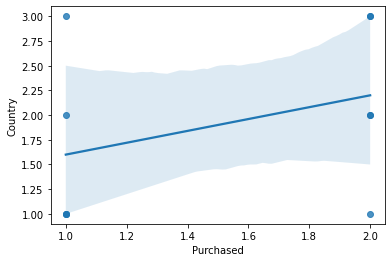

In [20]:
sns.regplot(x="Purchased", y="Country", data=data)

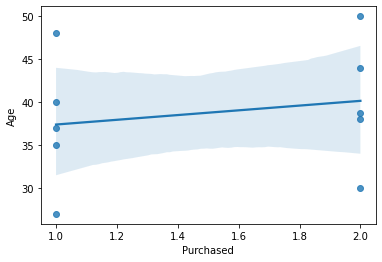

In [21]:
sns.regplot(x="Purchased", y="Age", data=data)

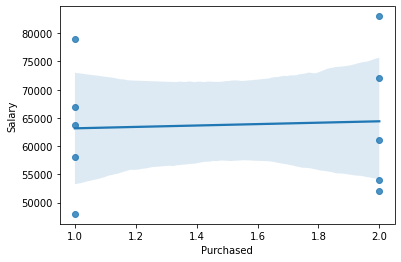

In [22]:
sns.regplot(x="Purchased", y="Salary", data=data)